In [ ]:
pip install wandb

     |████████████████████████████████| 1.8MB 8.5MB/s 
     |████████████████████████████████| 174kB 45.4MB/s 
     |████████████████████████████████| 102kB 13.4MB/s 
     |████████████████████████████████| 133kB 43.8MB/s 
     |████████████████████████████████| 71kB 11.2MB/s 
  Created wheel for subprocess32: filename=subprocess32-3.5.4-cp37-none-any.whl size=6502 sha256=b9d2ebcd4f5f168b6fadd8843158b3ea92e2b0f08b40c60fb4730a4adc9b8429
  Stored in directory: /root/.cache/pip/wheels/68/39/1a/5e402bdfdf004af1786c8b853fd92f8c4a04f22aad179654d1
  Created wheel for pathtools: filename=pathtools-0.1.2-cp37-none-any.whl size=8807 sha256=88e9a530ef7dfd483fbbee15a897874b7d8189186f6d592f17fa1f29ab57a1ee
  Stored in directory: /root/.cache/pip/wheels/0b/04/79/c3b0c3a0266a3cb4376da31e5bfe8bba0c489246968a68e843
Successfully built subprocess32 pathtools


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import wandb
from wandb.keras import WandbCallback

In [24]:
!wget -O "data.tar" "https://cloud.enterprise.deepsystems.io/s/TK2z5TLYoAPl1w6/download"

--2021-07-05 12:22:59--  https://cloud.enterprise.deepsystems.io/s/TK2z5TLYoAPl1w6/download
Resolving cloud.enterprise.deepsystems.io (cloud.enterprise.deepsystems.io)... 162.210.193.32
Connecting to cloud.enterprise.deepsystems.io (cloud.enterprise.deepsystems.io)|162.210.193.32|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7876085760 (7.3G) [application/x-tar]
Saving to: ‘data.tar’

data.tar            100%[===================>]   7.33G  37.8MB/s    in 2m 49s  

2021-07-05 12:25:48 (44.5 MB/s) - ‘data.tar’ saved [7876085760/7876085760]



In [25]:
!tar -xvf "data.tar" -C "." &> /dev/null #[run this cell to extract tar files]
!rm data.tar

In [ ]:
# annotation["objects"]

In [ ]:
# annotation_base64

In [ ]:
# annotation_origin

In [ ]:
# import PIL
# import numpy as np

# img=open("/content/Supervisely Person Dataset/ds1/img/bodybuilder-weight-training-stress-38630.png","rb")
# # img=np.array(img)
# img=img.read()
# print("before encoding:",img[0:100])
# encoding=base64.b64encode(img)
# print("encoding:",encoding[0:100])
# decodeencoding=encoding
# decoding=base64.b64decode(decodeencoding)
# im_file = BytesIO(decoding)
# print("decoding:",decoding[0:100])
# print("see:",im_file)
# Image.open(im_file)

In [ ]:
# import base64
# print(annotation_base64)
# # base64.b64decode(annotation_base64)

# decoded=base64.b64decode(annotation_base64)
# print(decoded)
# encoded=base64.b64encode(decoded)
# decoded=base64.b64decode(encoded)
# decoded

In [ ]:
# decoded

In [ ]:
# byteimg=BytesIO(decoded)
# Image.open(byteimg)

In [ ]:
# a = 'eW91ciB0ZXh0'
# base64.b64decode(a)

In [ ]:
# decodeit = open('hello_level.jpeg', 'wb')
# decodeit.write(decoded)
# decodeit.close()

In [ ]:
# import base64
# from io import BytesIO
# from PIL import Image

# with open("/content/Supervisely Person Dataset/ds1/img/bodybuilder-weight-training-stress-38630.png", "rb") as f:
#     im_b64 = base64.b64encode(f.read())

# im_b64=annotation_base64
# im_bytes = base64.b64decode(im_b64)   # im_bytes is a binary image
# im_file = BytesIO(im_bytes)  # convert image to file-like object
# Image.open(im_file)   

In [ ]:
# img

In [ ]:
def base64_2_mask(s):
    z = zlib.decompress(base64.b64decode(s))
    n = np.fromstring(z, np.uint8)
    mask = cv2.imdecode(n, cv2.IMREAD_UNCHANGED)[:, :, 3].astype(bool)
    return mask

def mask_2_base64(mask):
    img_pil = Image.fromarray(np.array(mask, dtype=np.uint8))
    img_pil.putpalette([0,0,0,255,255,255])
    bytes_io = io.BytesIO()
    img_pil.save(bytes_io, format='PNG', transparency=0, optimize=0)
    bytes = bytes_io.getvalue()
    return base64.b64encode(zlib.compress(bytes)).decode('utf-8')

In [ ]:
def imageresize(img,needed_w,needed_h,debug=False,color=(255,255,255,255)):
  img_w=img.width
  img_h=img.height
  img_ratio=img_w/img_h
  needed_ratio=needed_w/needed_h
  resize_w=0
  resize_h=0
  if img_w<needed_w and img_h<needed_h:
    # if debug:
    #   print("1.img_w<needed_w and img_h<needed_h")
    if img_ratio==needed_ratio:
      resize_w=needed_w
      resize_h=needed_h
      img=img.resize((needed_w,needed_h))
    else:
      minvalue=np.min([needed_w/img_w,needed_h/img_h])
      resize_w=round(img_w*minvalue)
      resize_h=round(img_h*minvalue)
      img=img.resize((resize_w,resize_h))

  elif img_w>=needed_w and img_h>=needed_h:
    # if debug:
    #   print("2.img_w>=needed_w and img_h>=needed_h")
    if img_ratio==needed_ratio:
      resize_w=needed_w
      resize_h=needed_h
      img=img.resize((needed_w,needed_h))
    else:
      minvalue=np.min([needed_w/img_w,needed_h/img_h])
      resize_w=round(img_w*minvalue)
      resize_h=round(img_h*minvalue)
      img=img.resize((resize_w,resize_h))

  elif img_w<needed_w and img_h>=needed_h:
    # if debug:
    #   print("3.img_w<needed_w and img_h>=needed_h")
    minvalue=np.min([needed_w/img_w,needed_h/img_h])
    resize_w=round(img_w*minvalue)
    resize_h=round(img_h*minvalue)
    img=img.resize((resize_w,resize_h))
    
  elif img_w>=needed_w and img_h<needed_h:
    # if debug:
    #   print("4.img_w>=needed_w and img_h<needed_h")
    minvalue=np.min([needed_w/img_w,needed_h/img_h])
    resize_w=round(img_w*minvalue)
    resize_h=round(img_h*minvalue)
    img=img.resize((resize_w,resize_h))
  else:
    # if debug:
    #   print("5.else")
    pass#do nothing cuz this means we already have the required width height
  # if debug:
  #   print("resized w and h",resize_w,resize_h)
  #   if resize_w>needed_w or resize_h>needed_h:
  #     print("!!!!!!!!!!!!!!!!!!!!WARNING!!!!!!!!!!!!!!!!!!!!!")
  background=PIL.Image.new("RGBA",(needed_w,needed_h),color)
  # offset=(round(needed_w/2),round(needed_h/2))# center of background
  offset=(round((needed_w/2)-(resize_w/2)),round((needed_h/2)-(resize_h/2)))
  background.paste(img,offset)
  return background.convert("RGB")

In [ ]:
import numpy
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def polygontomask(polygon_exterior,polygon_interior,annotation,nointerior=False,debug=False,required=[1000,800]):
  # polygon = [(x1,y1),(x2,y2),...] or [x1,y1,x2,y2,...]
  width =  annotation["size"]["width"]
  height =annotation["size"]["height"]

  img = Image.new('L', (width,height), 0)
  ImageDraw.Draw(img).polygon(tuple(map(tuple, polygon_exterior)), outline=1, fill=1)
  ex_mask = numpy.array(img)

  img = Image.new('L', (width,height), 0)
  # if debug:
  #   print("len(polygon_interior)",len(polygon_interior))
  #   print("polygon_interior",polygon_interior)

  if not nointerior:
    if len(polygon_interior)!=0:
      if len(polygon_interior[0])!=0:
        # print(polygon_interior[0])
        # if debug:
        #   print("tesssssssssssss")
        for interior in polygon_interior:
          ImageDraw.Draw(img).polygon(tuple(map(tuple, interior)), outline=1, fill=1)

  in_mask = numpy.array(img)
  in_mask=(in_mask>0)
  in_mask=np.invert(in_mask)
  in_mask=in_mask*1

  mask=ex_mask*in_mask
  mask=np.expand_dims(mask,axis=-1)
  mask=np.uint8(np.repeat(mask,3,axis=-1))
  mask=Image.fromarray(mask)
  mask=mask.resize((required[0],required[1]))
  # mask=imageresize(mask,required[0],required[1],color=(0,0,0,0))
  # if debug:
  #   print(mask.dtype)
  return mask

# plt.figure()
# plt.imshow(polygontomask(annotation_polygon_exterior[0],annotation))
# img=Image.open(imgpath)
# plt.figure()
# plt.imshow(img)

In [ ]:
import PIL
def bitmaptomask(bitmap,origin,h,w,required=[1000,800]):
  encoded_string = bitmap
  # print(encoded_string)
  boolimg=base64_2_mask(encoded_string)
  boolimg=boolimg*1
  # print(boolimg)
  # plt.imshow(boolimg,)

  # bg=PIL.Image.open(imgpath)
  bg=np.zeros([h,w])
  bg=Image.fromarray(np.uint8(bg*255),mode="L")

  mask=Image.fromarray(np.uint8(boolimg*255),mode="L")
  # mask=np.array(mask)
  bg.paste(mask,box=origin)

  bg=np.expand_dims(bg,axis=-1)
  bg=np.uint8(np.repeat(bg,3,axis=-1))
  bg=Image.fromarray(bg)
  bg=bg.resize((required[0],required[1]))
  # bg=imageresize(bg,required[0],required[1],color=(0,0,0,0))
  return np.array(bg)
# bg
# plt.figure()
# plt.imshow(bitmaptomask(annotation_base64[0],annotation_origin[0],imgpath),)

In [ ]:
import json
import numpy as np
import cv2, zlib, base64, io
from PIL import Image
import matplotlib.pyplot as plt
import os

basedir="/content/Supervisely Person Dataset/ds1/ann"
listofdirs=os.listdir(basedir)
# num=int(input("num:"))
pathstr=basedir+"/"+listofdirs[1]
print(pathstr)
# data=open("/content/Supervisely Person Dataset/ds1/ann/bodybuilder-weight-training-stress-38630.png.json","r")
# data=open("/content/Supervisely Person Dataset/ds1/ann/city-woman-view-blue-sky.png.json","r")

def load_one(pathstr,debug=False,show=False):
  data=open(pathstr,"r")
  annotation=json.load(data)
  # print(annotation[])
  parts=pathstr.rsplit("/",2)
  if debug:
    print(parts[-1][:-5])
  imgpath=os.path.join(parts[0],"img",parts[-1][:-5])
  annotation_base64=[]
  annotation_origin=[]
  annotation_polygon_interior=[]
  annotation_polygon_exterior=[]
  for obj in annotation["objects"]:
    if debug:
      print(obj["geometryType"])
    if obj["geometryType"]=="bitmap":
      annotation_base64.append(obj["bitmap"]["data"])
      annotation_origin.append(obj["bitmap"]["origin"])
    elif obj["geometryType"]=="polygon":
      annotation_polygon_exterior.append(obj["points"]["exterior"])
      annotation_polygon_interior.append(obj["points"]["interior"])
      # annotation_polygon.append()
  # annotation["objects"]
  if debug:
    print(annotation_base64)
    print(annotation_origin)
    print(annotation_polygon_exterior)
    print(annotation_polygon_interior)

  allbitmaps=PIL.Image.open(imgpath)
  allbitmaps=allbitmaps.convert("L")
  allbitmaps=np.array(allbitmaps)
  allbitmaps=allbitmaps*0
  for i in range(len(annotation_base64)):
    temp=bitmaptomask(annotation_base64[i],annotation_origin[i],imgpath)
    allbitmaps+=temp
  allbitmaps=(allbitmaps>0)*255
  

  allpoly=PIL.Image.open(imgpath)
  allpoly=allpoly.convert("L")
  allpoly=np.array(allpoly)
  allpoly=allpoly*0
  for i in range(len(annotation_polygon_exterior)):
    temp=polygontomask(annotation_polygon_exterior[i],annotation_polygon_interior[i],annotation)
    allpoly+=temp
  allpoly=(allpoly>0)*255

  all=allbitmaps+allpoly
  all=(all>0)*255

  if show:
    if debug:
      plt.figure()
      plt.title("allbitmaps")
      plt.imshow(allbitmaps)

      plt.figure()
      plt.title("allpoly")
      plt.imshow(allpoly)
    else:
      plt.figure()
      plt.title("all")
      plt.imshow(all)
    
  img=Image.open(imgpath)
  if show:
    plt.figure()
    plt.title("original")
    plt.imshow(img)
  img=np.array(img)
  
  all=np.expand_dims(all,axis=-1)
  all=np.uint8(np.repeat(all,3,axis=-1))
  # print(img.shape)
  # print(all.shape)
  img=Image.fromarray(img)
  all=Image.fromarray(all)
  img=imageresize(img,1000,800)
  all=imageresize(all,1000,800,color=(0,0,0,0))
  img=np.array(img)
  all=np.array(all)
  return img,all

FileNotFoundError: ignored

In [ ]:
import json
import numpy as np
import cv2, zlib, base64, io
from PIL import Image
import matplotlib.pyplot as plt
import os

basedir="/content/Supervisely Person Dataset/ds1/ann"
listofdirs=os.listdir(basedir)
# num=int(input("num:"))
pathstr=basedir+"/"+listofdirs[1]
print(pathstr)
# data=open("/content/Supervisely Person Dataset/ds1/ann/bodybuilder-weight-training-stress-38630.png.json","r")
# data=open("/content/Supervisely Person Dataset/ds1/ann/city-woman-view-blue-sky.png.json","r")

def load_one_faster(pathstr,debug=False,nointerior=False,show=False,required=[1000,800]):
  ##this is faster cuz this uses 2 loop lesser
  data=open(pathstr,"r")
  annotation=json.load(data)
  # print(annotation[])
  parts=pathstr.rsplit("/",2)
  if debug:
    print(parts[-1][:-5])
  imgpath=os.path.join(parts[0],"img",parts[-1][:-5])
  annotation_base64=[]
  annotation_origin=[]
  annotation_polygon_interior=[]
  annotation_polygon_exterior=[]

  # allbitmaps=PIL.Image.open(imgpath)
  # allbitmaps=allbitmaps.convert("L")
  # allbitmaps=np.array(allbitmaps)
  # allbitmaps=allbitmaps*0
  # allpoly=allbitmaps
  # # allpoly=PIL.Image.open(imgpath)
  # # allpoly=allpoly.convert("L")
  # # allpoly=np.array(allpoly)
  # # allpoly=allpoly*0
  # allpoly=(allbitmaps*0)
  allbitmaps=np.zeros([required[1],required[0],3])
  allpoly=np.zeros([required[1],required[0],3])
  for obj in annotation["objects"]:
    if obj["geometryType"]=="bitmap":
      annotation_base64.append(obj["bitmap"]["data"])
      annotation_origin.append(obj["bitmap"]["origin"])
      temp=bitmaptomask(obj["bitmap"]["data"],obj["bitmap"]["origin"],annotation["size"]["height"],annotation["size"]["width"],required=required)
      allbitmaps+=temp
    elif obj["geometryType"]=="polygon":
      annotation_polygon_exterior.append(obj["points"]["exterior"])
      annotation_polygon_interior.append(obj["points"]["interior"])
      temp=polygontomask(obj["points"]["exterior"],obj["points"]["interior"],annotation,nointerior=nointerior,debug=debug,required=required)
      allpoly+=temp
      # annotation_polygon.append()
    temp=0
  allbitmaps=(allbitmaps>0)*255
  allpoly=(allpoly>0)*255

  all=allbitmaps+allpoly
  all=(all>0)*255

  # annotation["objects"]
  ##########################to seeeeeeeee
  # if debug:
  #   print(annotation_base64)
  #   print(annotation_origin)
  #   print(annotation_polygon_exterior)
  #   print(annotation_polygon_interior)
  
  # if show:
  #   if debug:
  #     plt.figure()
  #     plt.title("allbitmaps")
  #     plt.imshow(allbitmaps)

  #     plt.figure()
  #     plt.title("allpoly")
  #     plt.imshow(allpoly)
  #   else:
  #     plt.figure()
  #     plt.title("all")
  #     plt.imshow(all)

  img=Image.open(imgpath)
  img=img.convert("RGB")
  # if show:
  #   plt.figure()
  #   plt.title("original")
  #   plt.imshow(img)
  # img=np.array(img)

  # all=np.expand_dims(all,axis=-1)
  # all=np.uint8(np.repeat(all,3,axis=-1))
  # print(img.shape)
  # print(all.shape)
  # img=Image.fromarray(img)
  # all=Image.fromarray(all)
  img=img.resize((required[0],required[1]))
  # img=imageresize(img,required[0],required[1])
  # all=imageresize(all,1000,800,color=(0,0,0,0))
  img=np.array(img)
  all=np.array(all)
  return img,all

FileNotFoundError: ignored

In [ ]:
import time

basedir="/content/Supervisely Person Dataset/"
all_folders=os.listdir(basedir)
listofdirs=np.array([])
for i in range(len(all_folders)):
  # print( all_folders[i],"\t",os.path.isdir(basedir+"/"+all_folders[i]))
  if os.path.isdir(basedir+"/"+all_folders[i]):
    jsons=os.listdir(basedir+all_folders[i]+"/ann/")
    jsons=[basedir+all_folders[i]+"/ann/"+json_name for json_name in jsons]
    listofdirs=np.concatenate([listofdirs,jsons])

print("Number of images ",len(listofdirs))
print(listofdirs[0])
# basedir="/content/Supervisely Person Dataset/ds10/ann"
# listofdirs=os.listdir(basedir)
def load_data(listofdirs,required=[1000,800]):
  batch_x=[]
  batch_y=[]
  # start=time.time()
  for i in range(len(listofdirs)):
    pathstr=listofdirs[i]
    # temp_x,temp_y=load_one(pathstr)
    temp_x,temp_y=load_one_faster(pathstr,debug=False,nointerior=False,show=False,required=required)
    temp_x=np.expand_dims(temp_x,axis=0)
    temp_y=np.expand_dims(temp_y,axis=0)
    if i==0:
      batch_x=temp_x
      batch_y=temp_y
    else:
      batch_x=np.concatenate([batch_x,temp_x],axis=0)
      batch_y=np.concatenate([batch_y,temp_y],axis=0)
  #   if i%10==0:
  #     print((i/len(listofdirs))*100,"%")
  # print(time.time()-start,"secs")
  return batch_x,batch_y

FileNotFoundError: ignored

In [ ]:
train_x,train_y=load_data(listofdirs[0:100],required=[512,256])
train_x=train_x/255
train_y=(train_y>0)*1
train_y=train_y[...,0:1]
# train_y.shape
print(train_x.shape,train_y.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


(100, 256, 512, 3) (100, 256, 512, 1)


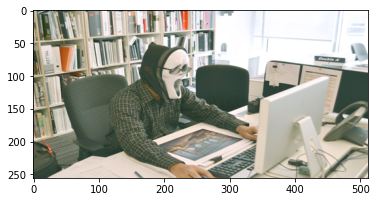

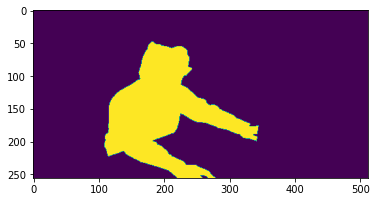

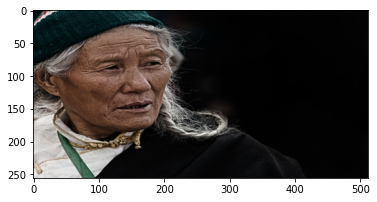

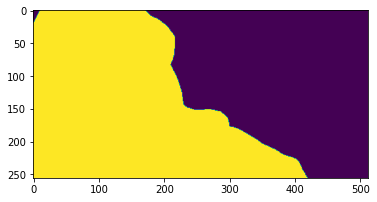

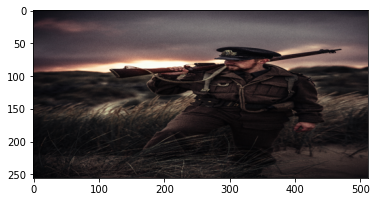

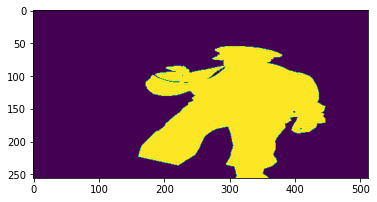

In [ ]:
for i in range(3):
  plt.figure()
  plt.imshow(train_x[i,...])
  plt.figure()
  plt.imshow(train_y[i,:,:,0])

In [ ]:
# arr=np.array([[0,1],
#               [1,0]])
# arr=np.expand_dims(arr,axis=-1)
# print(arr.shape)
# np.repeat(arr,3,axis=-1)

#DataGen

In [ ]:
import random
from tensorflow.keras.utils import Sequence
class datagenerator(Sequence):
  def __init__(self,listofdirs,batch_size=16,shuffle=False,dimensions=[800,600]):
    self.batch_size=batch_size
    self.listofdirs=listofdirs
    self.shuffle=shuffle
    self.dimensions=dimensions
  def __len__(self):
    return int(np.ceil(len(self.listofdirs)/self.batch_size))
  def __getitem__(self,idx):
    batch_list=self.listofdirs[self.batch_size*idx:self.batch_size*(idx+1)]
    # print(len(batch_list))
    batch_x,batch_y=load_data(batch_list,self.dimensions)
    batch_x=np.int64(batch_x)
    batch_x=batch_x/255
    batch_y=(batch_y>0)*1
    batch_y=batch_y[...,0:1]
    return batch_x,batch_y
  def on_epoch_end(self):
      if self.shuffle:
        predlogging()
        random.shuffle(self.listofdirs)

In [ ]:
traingen=datagenerator(listofdirs,dimensions=[256,256],batch_size=16,shuffle=False)
train_x,train_y=traingen.__getitem__(0)
traingen.__len__()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


357

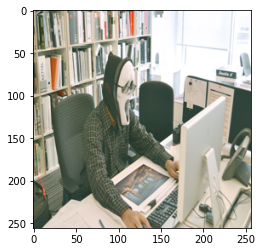

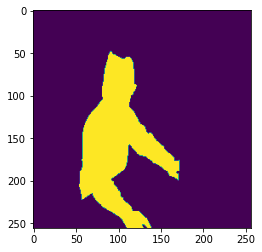

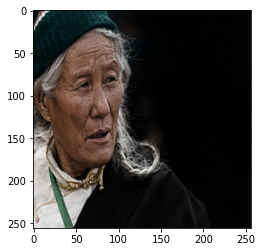

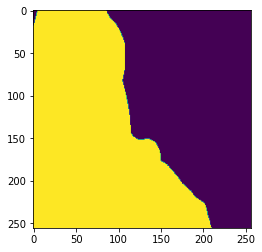

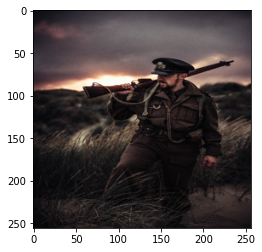

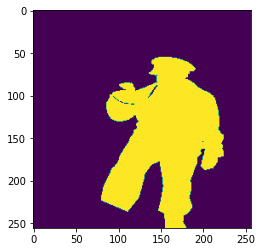

In [ ]:
for i in range(3):
  plt.figure()
  plt.imshow(train_x[i,...])
  plt.figure()
  plt.imshow(train_y[i,:,:,0])

#Model

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model,layers

In [3]:
def conv_block(input,filters):
  x=layers.Conv2D(filters,(3,3),padding="same")(input)
  # x=layers.BatchNormalization()(x)
  x=layers.BatchNormalization(trainable=True)(x,training=True)
  x=layers.Activation("relu")(x)

  x=layers.Conv2D(filters,(3,3),padding="same")(x)
  # x=layers.BatchNormalization()(x)
  x=layers.BatchNormalization(trainable=True)(x,training=True)
  x=layers.Activation("relu")(x)

  return x

def encoder(input,filters):
  x=conv_block(input,filters)
  out=layers.MaxPool2D((2,2))(x)
  return x,out

def decoder(input,skip,filters):
  x=layers.Conv2DTranspose(filters,(2,2),strides=2,padding="same")(input)
  x=layers.Concatenate()([x,skip])
  x=conv_block(x,filters)
  return x

def unet():
  x_input=layers.Input(shape=(None,None,3))

  # encoder
  s1,x=encoder(x_input,64)
  s2,x=encoder(x,128)
  s3,x=encoder(x,256)
  s4,x=encoder(x,512)

  # mid
  x=conv_block(x,1024)

  # decoder
  x=decoder(x,s4,512)
  x=decoder(x,s3,256)
  x=decoder(x,s2,128)
  x=decoder(x,s1,64)

  # output
  output=layers.Conv2D(1,(1,1),padding="same",activation="sigmoid")(x)
  model=Model(inputs=x_input,outputs=output,name="UNet")
  return model

In [4]:
def model1():
  x_input=layers.Input(shape=(None,None,3))
  #encoder
  x=layers.Conv2D(32,(3,3),strides=2,padding="same",activation="relu")(x_input)
  x=layers.Conv2D(64,(3,3),strides=2,padding="same",activation="relu")(x)
  x=layers.Conv2D(128,(3,3),strides=2,padding="same",activation="relu")(x)

  #decoder
  x=layers.UpSampling2D()(x)
  x=layers.Conv2D(128,(3,3),padding="same",activation="relu")(x)
  x=layers.UpSampling2D()(x)
  x=layers.Conv2D(64,(3,3),padding="same",activation="relu")(x)
  x=layers.UpSampling2D()(x)
  x=layers.Conv2D(32,(3,3),padding="same",activation="relu")(x)
  x=layers.Conv2D(1,(1,1),activation="sigmoid")(x)
  model=Model(inputs=x_input,outputs=x)
  # model.summary()
  return model

In [5]:
def model2():
  x_input=layers.Input(shape=(None,None,3))
  #encoder
  x=layers.Conv2D(32,(3,3),strides=1,padding="same",activation="relu")(x_input)
  x=layers.Conv2D(32,(3,3),strides=2,padding="same",activation="relu")(x_input)
  x=layers.Conv2D(64,(3,3),strides=1,padding="same",activation="relu")(x)
  x=layers.Conv2D(64,(3,3),strides=2,padding="same",activation="relu")(x)
  x=layers.Conv2D(128,(3,3),strides=1,padding="same",activation="relu")(x)
  x=layers.Conv2D(128,(3,3),strides=2,padding="same",activation="relu")(x)

  #decoder
  x=layers.UpSampling2D()(x)
  x=layers.Conv2D(128,(3,3),padding="same",activation="relu")(x)
  x=layers.Conv2D(128,(3,3),padding="same",activation="relu")(x)
  x=layers.UpSampling2D()(x)
  x=layers.Conv2D(64,(3,3),padding="same",activation="relu")(x)
  x=layers.Conv2D(64,(3,3),padding="same",activation="relu")(x)
  x=layers.UpSampling2D()(x)
  x=layers.Conv2D(32,(3,3),padding="same",activation="relu")(x)
  x=layers.Conv2D(32,(3,3),padding="same",activation="relu")(x)
  x=layers.Conv2D(1,(1,1),activation="sigmoid")(x)
  model=Model(inputs=x_input,outputs=x)
  # model.summary()
  return model

In [6]:
def model3():
  x_input=layers.Input(shape=(None,None,3))
  #encoder
  x=layers.Conv2D(32,(7,7),strides=1,padding="same",activation="relu")(x_input)
  x=layers.Conv2D(32,(7,7),strides=2,padding="same",activation="relu")(x_input)
  x=layers.Conv2D(64,(5,5),strides=1,padding="same",activation="relu")(x)
  x=layers.Conv2D(64,(5,5),strides=2,padding="same",activation="relu")(x)
  x=layers.Conv2D(128,(3,3),strides=1,padding="same",activation="relu")(x)
  x=layers.Conv2D(128,(3,3),strides=2,padding="same",activation="relu")(x)

  #decoder
  x=layers.UpSampling2D()(x)
  x=layers.Conv2D(128,(3,3),padding="same",activation="relu")(x)
  x=layers.Conv2D(128,(3,3),padding="same",activation="relu")(x)
  x=layers.UpSampling2D()(x)
  x=layers.Conv2D(64,(3,3),padding="same",activation="relu")(x)
  x=layers.Conv2D(64,(3,3),padding="same",activation="relu")(x)
  x=layers.UpSampling2D()(x)
  x=layers.Conv2D(32,(3,3),padding="same",activation="relu")(x)
  x=layers.Conv2D(32,(3,3),padding="same",activation="relu")(x)
  x=layers.Conv2D(1,(1,1),activation="sigmoid")(x)
  model=Model(inputs=x_input,outputs=x)
  # model.summary()
  return model

#training(hyperparameter tuning)

In [ ]:
def train():
  config_defaults = {
      'batch_size': 8,
      'learning_rate': 0.01
  }
  wandb.init(config=config_defaults)

  # Specify the other hyperparameters to the configuration, if any
  wandb.config.epochs = 10
  # Iniialize model with hyperparameters
  keras.backend.clear_session()
  if wandb.config.model=="model1":
    model=model1()
  elif wandb.config.model=="model2":
    model=model2()
  elif wandb.config.model=="model3":
    model=model3()

  ###making datagenerator
  trainloader=datagenerator(listofdirs[:200],batch_size=wandb.config.batch_size,dimensions=[600,400],shuffle=True)

  # Compile the model
  opt = tf.keras.optimizers.Adam(learning_rate=wandb.config.learning_rate) # optimizer with different learning rate specified by config
  model.compile(opt, 'binary_crossentropy', metrics=['acc'])

  # Train the model
  _=model.fit_generator(trainloader,epochs=wandb.config.epochs,callbacks=[WandbCallback()])

In [ ]:
sweep_config = {
  'method': 'grid', 
  'metric': {
      'name': 'loss',
      'goal': 'minimize'
  },
  'early_terminate':{
      'type': 'hyperband',
      'min_iter': 5
  },
  'parameters': {
      'model': {
          'values': ['model1','model2','model3']
      },
      'learning_rate':{
          'values':[0.01,0.001,0.0001]
      },
      'batch_size':{
          'values':[8,16,32]
      }
  }
}

In [ ]:
sweep_id = wandb.sweep(sweep_config, project='human_segmentation', entity='anujpanthri')

Create sweep with ID: r4qocqfc
Sweep URL: https://wandb.ai/anujpanthri/human_segmentation/sweeps/r4qocqfc


In [ ]:
# wandb.agent(sweep_id, function=train)

wandb: Agent Starting Run: e39x2v3f with config:
wandb: 	batch_size: 8
wandb: 	learning_rate: 0.01
wandb: 	model: model1


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 32)    896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, None, None, 128)   0     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
25/25 [==============================] - 30s 1s/step - loss: 109.7915 - acc: 0.7767
Epoch 2/10
25/25 [==============================] - 31s 1s/step - loss: 0.5092 - acc: 0.7966
Epoch 3/10
25/25 [==============================] - 30s 1s/step - loss: 0.5064 - acc: 0.7966
Epoch 4/10
25/25 [==============================] - 31s 1s/step - loss: 0.5062 - acc: 0.7966
Epoch 5/10
25/25 [==============================] - 30s 1s/step - loss: 0.5077 - acc: 0.7966
Epoch 6/10
25/25 [==============================] - 30s 1s/step - loss: 0.5186 - acc: 0.7966
Epoch 7/10
25/25 [==============================] - 30s 1s/step - loss: 0.5302 - acc: 0.7966
Epoch 8/10
25/25 [==============================] - 30s 1s/step - loss: 0.5056 - acc: 0.7966
Epoch 9/10
25/25 [==============================] - 30s 1s/step - loss: 0.5052 - acc: 0.7966
Epoch 10/10
25/25 [==============================] - 30s 1s/step - loss: 0.5053 - acc: 0.7966


wandb: Agent Starting Run: hfmkdnzf with config:
wandb: 	batch_size: 8
wandb: 	learning_rate: 0.01
wandb: 	model: model2


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0     

wandb: Agent Starting Run: avr1t7mk with config:
wandb: 	batch_size: 8
wandb: 	learning_rate: 0.01
wandb: 	model: model3


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    4736      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    102464    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0     

wandb: Agent Starting Run: 6r70i6as with config:
wandb: 	batch_size: 8
wandb: 	learning_rate: 0.001
wandb: 	model: model1


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 32)    896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, None, None, 128)   0     

wandb: Agent Starting Run: 4qc4fdex with config:
wandb: 	batch_size: 8
wandb: 	learning_rate: 0.001
wandb: 	model: model2


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0     

wandb: Agent Starting Run: 4e7250wx with config:
wandb: 	batch_size: 8
wandb: 	learning_rate: 0.001
wandb: 	model: model3


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    4736      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    102464    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0     

wandb: Agent Starting Run: 6v7xhjjl with config:
wandb: 	batch_size: 8
wandb: 	learning_rate: 0.0001
wandb: 	model: model1


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 32)    896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, None, None, 128)   0     

wandb: Agent Starting Run: xo3rqri7 with config:
wandb: 	batch_size: 8
wandb: 	learning_rate: 0.0001
wandb: 	model: model2


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0     

wandb: Agent Starting Run: w8k1oz9x with config:
wandb: 	batch_size: 8
wandb: 	learning_rate: 0.0001
wandb: 	model: model3


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    4736      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    102464    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0     

wandb: Agent Starting Run: d3a2t9yt with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.01
wandb: 	model: model1


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 32)    896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, None, None, 128)   0     

wandb: Agent Starting Run: d86u6mzu with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.01
wandb: 	model: model2


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0     

wandb: Agent Starting Run: ti2e9hxw with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.01
wandb: 	model: model3


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    4736      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    102464    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0     

wandb: Agent Starting Run: cbdduknw with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.001
wandb: 	model: model1


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 32)    896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, None, None, 128)   0     

wandb: Agent Starting Run: k5tcjf6r with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.001
wandb: 	model: model2


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0     

wandb: Agent Starting Run: dmgzfnb7 with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.001
wandb: 	model: model3


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    4736      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    102464    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0     

wandb: Agent Starting Run: r3f884zk with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0001
wandb: 	model: model1


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d (Conv2D)              (None, None, None, 32)    896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, None, None, 128)   0     

wandb: Agent Starting Run: ukd03zca with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0001
wandb: 	model: model2


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0     

wandb: Agent Starting Run: 4i4vv93f with config:
wandb: 	batch_size: 16
wandb: 	learning_rate: 0.0001
wandb: 	model: model3


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 32)    4736      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 64)    51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, None, None, 64)    102464    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, None, None, 128)   73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, None, None, 128)   147584    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, None, None, 128)   0     

wandb: Agent Starting Run: qfdtqx1t with config:
wandb: 	batch_size: 32
wandb: 	learning_rate: 0.01
wandb: 	model: model1
wandb: Ctrl + C detected. Stopping sweep.


#training(with logging)

In [ ]:
model=unet()
# model.summary()

In [9]:
def calculate_dice(y_true,y_pred):
  y_true=tf.cast(y_true,dtype='float32')
  intersection=tf.multiply(y_true,y_pred)
  intersection=tf.cast(intersection,dtype='float32')
  intersection=tf.reduce_sum(intersection)
  union=tf.add(y_true,y_pred)
  # print("union",union)
  union=tf.cast(union,dtype='float32')
  union=tf.reduce_sum(union)

  # print(intersection,union)
  dice_score=(2*intersection)/(union)
  # dice_score=tf.reduce_mean(dice_score)
  return dice_score

In [ ]:
testdata=tf.cast([[1,0],
          [0,1]],dtype='float32')
testdata2=tf.cast([[1,0],
          [0,0]],dtype='float32')
print(calculate_dice(testdata,testdata2))

tf.Tensor(0.6666667, shape=(), dtype=float32)


In [8]:
def customloss(y_true,y_pred):
  bcloss=keras.losses.binary_crossentropy(y_true,y_pred)
  diceloss=1-calculate_dice(y_true,y_pred)
  loss=bcloss+diceloss
  return loss

In [ ]:
# del model

In [ ]:
def predlogging():
  print("logging")
  img,true=train_x,train_y
  pred=model.predict(img)
  pred=np.uint8((pred>0.5)*1)
  class_labels = {
    1: "person"
  }  
  for i in range(pred.shape[0]):
    mask_img = wandb.Image(img[i,...], masks={
      "predictions": {
        "mask_data": pred[i,:,:,0],
        "class_labels": class_labels
      },
      "ground_truth": {
        "mask_data": true[i,:,:,0],
        "class_labels": class_labels
      }

    })
    wandb.log({f"predictions {i+1}:": mask_img,})

In [ ]:
# import requests
# url="https://storage.googleapis.com/wandb-production.appspot.com/anujpanthri/human_segmentation/d7i9cbys/model-best.h5?Expires=1625366712&GoogleAccessId=wandb-production%40appspot.gserviceaccount.com&Signature=C4YaClVQelTh8XegumggiNY7wVOEU36%2FVaKn2ddLtZCwkhgi4bRQWj%2BT3%2FOvuJQ6K5SZlohbzkRHP7SJnzIlezjsbklxyS2COWuzRjsAHE2mEeQa3tz%2Fc6Vepp%2FCDLB6np1wMRDjW%2F4bs74w8wPosayFZ5P5cpqdM8L1D%2FRGku%2FzWBCORTEiVErUnYNUOxmKyNN6fcx9YkuNQlxPJW%2BeVS0m5VFrtjxdLjUcDZbrrWnOKsnmCof1MR0iPHx2vQUMLXzpy4hCSc8dHDE87iNI19%2B02wBu2WZrcOD%2F%2Bomni28fdFsZkMl5RkU70vavPfH7axAYs5zMQLZf6EnJhamqYQ%3D%3D"
# data=requests.get(url,allow_redirects=True)
# open("best.h5","wb").write(data.content)
# model=keras.models.load_model('best.h5',custom_objects={"customloss":customloss,"calculate_dice":calculate_dice})

In [10]:
model=keras.models.load_model('/content/drive/MyDrive/human_segmention/nonewUnet.h5',custom_objects={"customloss":customloss,"calculate_dice":calculate_dice})
# model=keras.models.load_model('/content/drive/MyDrive/human_segmention/Unet.hdf5',custom_objects={"customloss":customloss,"calculate_dice":calculate_dice})

In [ ]:
# wandb.init(project='human_segmentation', entity='anujpanthri')

In [ ]:
# model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["acc"])

wandb.init(project='human_segmentation', entity='anujpanthri')

# 2. Save model inputs and hyperparameters
config = wandb.config
config.learning_rate = 0.001
config.epochs = 10

# model=unet()
# model.summary()
model.compile(loss=customloss,
              optimizer=keras.optimizers.Adam(learning_rate=config.learning_rate),
              metrics=[calculate_dice,"acc",keras.metrics.MeanIoU(num_classes=2),keras.metrics.Recall(),keras.metrics.Precision()]
              )
# 3. Log layer dimensions and metrics over time
#earlystopping
earlystop_callback=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
#save checkpoint
filepath="/content/drive/MyDrive/human_segmention/nonewUnet.h5"
checkpoint_callback=keras.callbacks.ModelCheckpoint(filepath,monitor='val_loss', verbose=1, save_best_only=True, mode='min')
# reduce lr on plateau
reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=2, min_lr=0.0001)
traingen=datagenerator(listofdirs[0:5000],dimensions=[256,256],batch_size=16,shuffle=True)
valgen=datagenerator(listofdirs[5000:],dimensions=[256,256],batch_size=16,shuffle=False)
# model.fit(x=train_x[0:1,...],y=train_y[0:1,...],epochs=20,validation_data=(train_x[0:1,...],train_y[0:1,...]))
# model.fit(x=train_x[0:1,...],y=train_y[0:1,...],epochs=1)
model.fit(traingen,epochs=config.epochs,validation_data=valgen,callbacks=[WandbCallback(),earlystop_callback,checkpoint_callback,reduce_lr])
# model.fit(x=train_x[1:2,...],y=train_y[1:2,...],epochs=50,callbacks=[WandbCallback()])

<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
313/313 [==============================] - 924s 3s/step - loss: 0.3731 - calculate_dice: 0.8243 - acc: 0.9265 - mean_io_u: 0.3685 - recall: 0.8749 - precision: 0.8501 - val_loss: 0.3778 - val_calculate_dice: 0.8007 - val_acc: 0.9270 - val_mean_io_u: 0.3905 - val_recall: 0.9150 - val_precision: 0.7866

Epoch 00001: val_loss improved from inf to 0.37782, saving model to /content/drive/MyDrive/human_segmention/nonewUnet.h5
logging
Epoch 2/10
313/313 [==============================] - 911s 3s/step - loss: 0.3307 - calculate_dice: 0.8455 - acc: 0.9347 - mean_io_u: 0.3685 - recall: 0.8880 - precision: 0.8668 - val_loss: 0.3649 - val_calculate_dice: 0.8190 - val_acc: 0.9318 - val_mean_io_u: 0.3905 - val_recall: 0.9040 - val_precision: 0.8076

Epoch 00002: val_loss improved from 0.37782 to 0.36492, saving model to /content/drive/MyDrive/human_segmention/nonewUnet.h5
logging
Epoch 3/10
313/313 [==============================] - 919s 3s/step - loss: 0.3195 - calculate_dice: 0.8512 - a

In [ ]:
# predlogging()

logging


In [ ]:
# !pip install numba 

# from numba import cuda 
# device = cuda.get_current_device()
# device.reset()

In [ ]:
# model.fit_generator(traingen,epochs=2,callbacks=[WandbCallback()])
# model.fit(x=train_x,y=train_y,batch_size=32,epochs=100)

In [ ]:
# model.save('/content/drive/MyDrive/human_segmention/nonewUnet.h5')
# model.save('/content/drive/MyDrive/human_segmention/Unet.hdf5')
# keras.models.load_model('/content/drive/MyDrive/human_segmention/Unet.h5')
# model=keras.models.load_model('/content/drive/MyDrive/human_segmention/Unet.hdf5')

#results

In [ ]:
tf.reduce_sum(train_y[0,...]),tf.reduce_sum((train_y[0,...]==1)*1)

(<tf.Tensor: shape=(), dtype=int64, numpy=49579>,
 <tf.Tensor: shape=(), dtype=int64, numpy=49579>)

In [ ]:
listofdirs[0]

'/content/Supervisely Person Dataset/ds11/ann/pexels-photo-301977.png.json'

In [ ]:
# model.save('Unet.h5')
# del model

In [ ]:
# import keras

# m1=keras.models.load_model('Unet.h5')

In [ ]:
img,pred=train_x[0:1,...],train_y[0:1,...]
# model.fit(x=train_x[0:1,...],y=train_y[0:1,...],validation_data=(train_x[0:1,...],train_y[0:1,...]),epochs=25)
model.evaluate(x=img,y=pred)

TypeError: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


tf.Tensor(0.6221111, shape=(), dtype=float32)


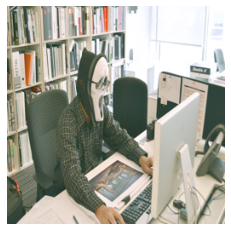

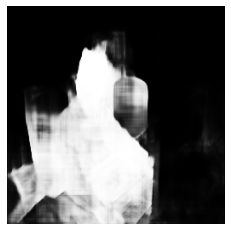

In [ ]:
# img=Image.open("/content/Supervisely Person Dataset/ds10/img/pexels-photo-345045.png")
# # img=Image.open("human.jpg")
# img=img.resize((512,256))
# img=imageresize(img,512,256)
# img=np.array(img)
# img=np.expand_dims(img,axis=0)
# img=img/255
# fig=plt.figure()
img,true=traingen.__getitem__(0)
plt.figure()
# fig.add_subplot(1,2,1)
plt.axis("off")
plt.imshow(img[0,:,:,:])
pred=model.predict(img[0:1,...])
# pred=np.uint8((pred>0.3)*1)
print(calculate_dice(true[0:1,...],pred))
# fig.add_subplot(1,2,2)
plt.figure()
plt.axis("off")
plt.imshow(pred[0,:,:,0],cmap="gray")
# plt.figure()
# plt.imshow(train_y[0,:,:,0],cmap="gray")

# class_labels = {
#   1: "person"
# }

# mask_img = wandb.Image(img[0,...], masks={
#   "predictions": {
#     "mask_data": pred[0,:,:,0],
#     "class_labels": class_labels
#   },
#   "ground_truth": {
#     "mask_data": true[0,:,:,0],
#     "class_labels": class_labels
#   }

# })
# wandb.log({"predictions": mask_img,})

IndexError: ignored

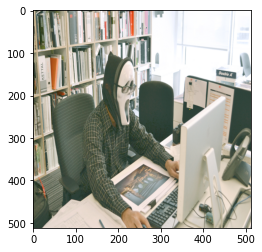

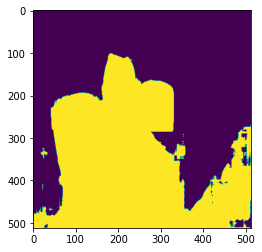

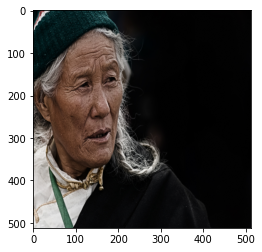

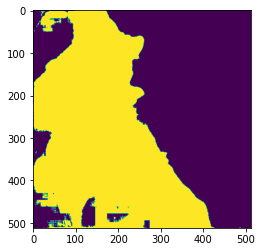

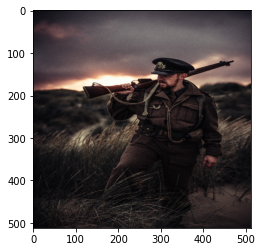

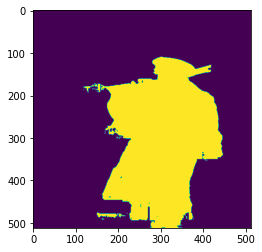

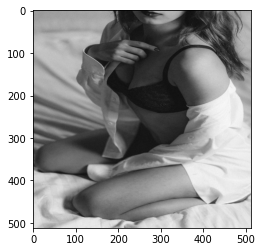

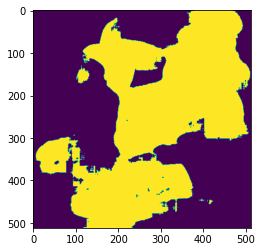

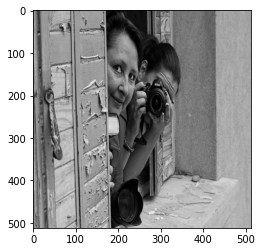

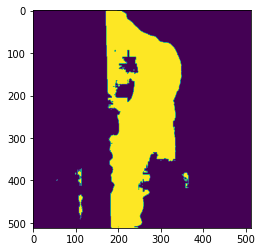

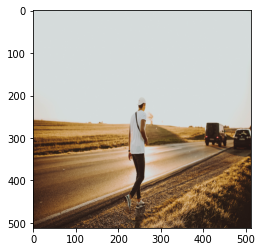

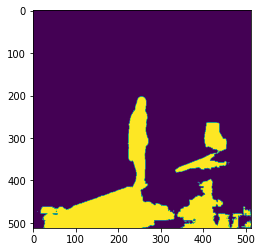

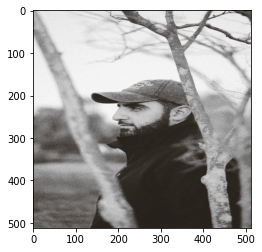

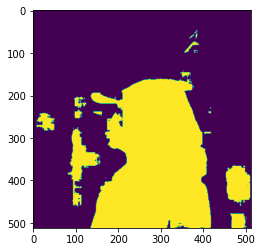

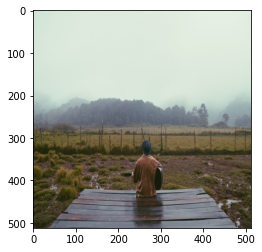

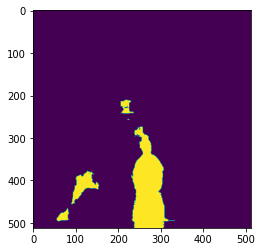

<Figure size 432x288 with 0 Axes>

In [ ]:
for i in range(0,8):
  plt.figure()
  plt.imshow(train_x[i,:,:,:])
  # pred=np.uint8((model.predict(train_x[i:i+1,:,:,:])>0.5)*1)
  pred=model.predict(train_x[i:i+1,:,:,:])
  pred=np.uint8((pred>0.5)*1)
  img=Image.fromarray(train_x[i,:,:,:],mode="RGB")
  img=img.convert("RGBA")
  img=np.array(img)
  # print(img.shape)
  plt.figure()
  plt.imshow(pred[0,:,:,0])
  img[...,3]=pred[0,:,:,0]*255
  # to see masks
  # plt.figure()
  # plt.imshow(img)

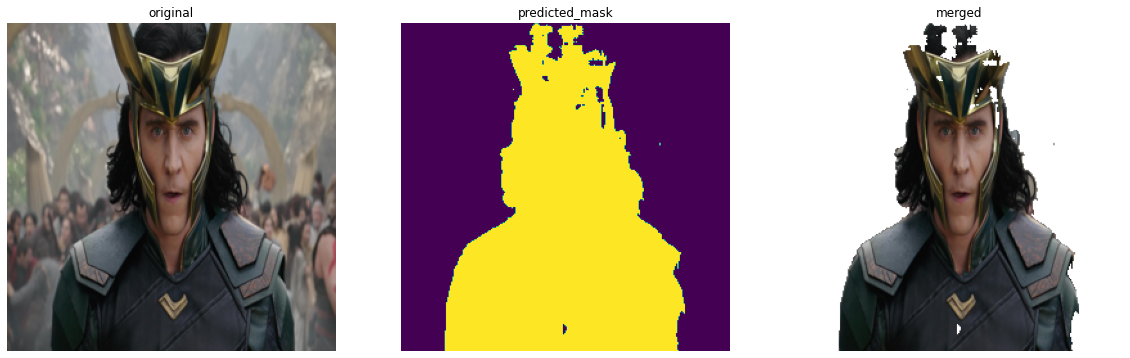

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# img=Image.open("/content/Supervisely Person Dataset/ds7/img/pexels-photo-722231.jpeg")
# img=Image.open("ankurtest.jpg")
# img=Image.open("ankurtest.jpg")
img=Image.open("loki2.png")
# img=Image.open("t4.jpeg")
img=img.convert("RGB")
img=img.resize((256,256))
# img=img.rotate(-90)
# img=imageresize(img,512,512)
img=np.array(img)
img=np.expand_dims(img,axis=0)

fig=plt.figure(figsize=(20,30))
fig.add_subplot(1,3,1)
plt.axis('off')
plt.title("original")
plt.imshow(img[0,:,:,:])
pred=np.uint8((model.predict(img)>0.5)*1)
img=Image.fromarray(img[0,...],mode="RGB")
img=img.convert("RGBA")
img=np.array(img)
# print(img.shape)
fig.add_subplot(1,3,2)
plt.axis('off')
plt.title("predicted_mask")
plt.imshow(pred[0,:,:,0])
img[...,3]=pred[0,:,:,0]*255
fig.add_subplot(1,3,3)
plt.axis('off')
plt.title("merged")
plt.imshow(img)

#decrease looping

In [ ]:
import json
import numpy as np
import cv2, zlib, base64, io
from PIL import Image
import matplotlib.pyplot as plt
import os

basedir="/content/Supervisely Person Dataset/ds1/ann"
listofdirs=os.listdir(basedir)
# num=int(input("num:"))
pathstr=basedir+"/"+listofdirs[1]
print(pathstr)
# data=open("/content/Supervisely Person Dataset/ds1/ann/bodybuilder-weight-training-stress-38630.png.json","r")
# data=open("/content/Supervisely Person Dataset/ds1/ann/city-woman-view-blue-sky.png.json","r")

def load_one_faster(pathstr,debug=False,nointerior=False):
  ##this is faster cuz this uses 2 loop lesser
  data=open(pathstr,"r")
  annotation=json.load(data)
  # print(annotation[])
  parts=pathstr.rsplit("/",2)
  if debug:
    print(parts[-1][:-5])
  imgpath=os.path.join(parts[0],"img",parts[-1][:-5])
  annotation_base64=[]
  annotation_origin=[]
  annotation_polygon_interior=[]
  annotation_polygon_exterior=[]

  allbitmaps=PIL.Image.open(imgpath)
  allbitmaps=allbitmaps.convert("L")
  allbitmaps=np.array(allbitmaps)
  allbitmaps=allbitmaps*0
  # allpoly=allbitmaps
  allpoly=PIL.Image.open(imgpath)
  allpoly=allpoly.convert("L")
  allpoly=np.array(allpoly)
  allpoly=allpoly*0
  for obj in annotation["objects"]:
    if debug:
      print(obj["geometryType"])
    if obj["geometryType"]=="bitmap":
      annotation_base64.append(obj["bitmap"]["data"])
      annotation_origin.append(obj["bitmap"]["origin"])
      temp=bitmaptomask(obj["bitmap"]["data"],obj["bitmap"]["origin"],imgpath)
      allbitmaps+=temp
    elif obj["geometryType"]=="polygon":
      annotation_polygon_exterior.append(obj["points"]["exterior"])
      annotation_polygon_interior.append(obj["points"]["interior"])
      temp=polygontomask(obj["points"]["exterior"],obj["points"]["interior"],annotation,nointerior=nointerior,debug=debug)
      allpoly+=temp
      # annotation_polygon.append()
    temp=0
  allbitmaps=(allbitmaps>0)*255
  allpoly=(allpoly>0)*255

  all=allbitmaps+allpoly
  all=(all>0)*255

  # annotation["objects"]
  if debug:
    print(annotation_base64)
    print(annotation_origin)
    print(annotation_polygon_exterior)
    print(annotation_polygon_interior)

  # allbitmaps=PIL.Image.open(imgpath)
  # allbitmaps=allbitmaps.convert("L")
  # allbitmaps=np.array(allbitmaps)
  # allbitmaps=allbitmaps*0
  # for i in range(len(annotation_base64)):
  #   temp=bitmaptomask(annotation_base64[i],annotation_origin[i],imgpath)
  #   allbitmaps+=temp
  # allbitmaps=(allbitmaps>0)*255
  

  # allpoly=PIL.Image.open(imgpath)
  # allpoly=allpoly.convert("L")
  # allpoly=np.array(allpoly)
  # allpoly=allpoly*0
  # for i in range(len(annotation_polygon_exterior)):
  #   temp=polygontomask(annotation_polygon_exterior[i],annotation)
  #   allpoly+=temp
  # allpoly=(allpoly>0)*255

  # all=allbitmaps+allpoly
  # all=(all>0)*255

  if debug:
    plt.figure()
    plt.title("allbitmaps")
    plt.imshow(allbitmaps)

    plt.figure()
    plt.title("allpoly")
    plt.imshow(allpoly)
  else:
    plt.figure()
    plt.title("all")
    plt.imshow(all)
  img=Image.open(imgpath)
  plt.figure()
  plt.title("original")
  plt.imshow(img)

/content/Supervisely Person Dataset/ds1/ann/pexels-photo-214576.png.json


/content/Supervisely Person Dataset/ds10/ann/pexels-photo-695963.png.json
pexels-photo-695963.png
polygon
len(polygon_interior) 0
polygon_interior []
uint8
polygon
len(polygon_interior) 0
polygon_interior []
uint8
polygon
len(polygon_interior) 0
polygon_interior []
uint8
[]
[]
[[[1, 673], [40, 660], [74, 644], [86, 653], [101, 669], [71, 680], [76, 686], [70, 707], [69, 731], [110, 741], [126, 648], [136, 614], [158, 587], [180, 560], [185, 527], [190, 505], [211, 500], [242, 500], [254, 505], [246, 548], [245, 561], [264, 589], [273, 604], [274, 625], [293, 633], [306, 629], [320, 623], [313, 619], [314, 603], [308, 585], [310, 568], [323, 550], [311, 511], [308, 487], [301, 456], [293, 440], [281, 431], [265, 425], [244, 418], [243, 398], [247, 378], [249, 364], [255, 350], [258, 336], [260, 330], [267, 326], [263, 320], [255, 318], [258, 291], [255, 271], [246, 253], [238, 241], [247, 229], [263, 221], [268, 205], [246, 182], [213, 180], [198, 173], [174, 177], [144, 189], [107, 199

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  This is separate from the ipykernel package so we can avoid doing imports until


['eJwBeQeG+IlQTkcNChoKAAAADUlIRFIAAAEuAAAB+gEDAAAAgyEzOQAAAAZQTFRFAAAA////pdmf3QAAAAF0Uk5TAEDm2GYAAAchSURBVHic3dwx1uMmEABg6alQyRE4CtdKB6lS5gi5CnkptswRQpdy2beN8qKIyJJBMAwwkvWvs6Ez/mTEMAKZX/67Li3MLV27jM65thpW5VSTPZTTlCadMy0mNmYbqt+UmxqM7WxuMLmzRuCebbYYozFBY86XqhpojNGYuJXJdzB3J+uDqg4WkR1jVU1LIuvPsvolc5bZKpM0Jm5l/CSr95TR2HiS1WekMPb1yYF41R9jr6ouME1jpsqIYx9YPXBnGbFRwPiEM5MyMdPYgrPsZDA2/QAYGD3PgOrB6BXYgDOYlSNg4hSDyctAFwqMA8bxRiUIJM4GGG88jZibBfJhMD8EOK4w8JLG4FngbO3BlPTK55FO2DoGX5JQ4mzt2NckIjgTNLbW/tlmj0kvZQJjj2M/NxlzG1saTJLYPoHizIA23e/JKHhmYec/oSyq2yt+Q9nR++ek/WuSI4GFTgx1ZlKmCsx3YvTMoswfzJ5M4sx3jD8ZNwGx+WALYEwH5eKiks8PKG4xekOmPeriO8YjIn7lPAa+T9Tz+HAiyrMxZVPaQqEHe0SOFkI80h7so38cGvoA1Hb8cagflR6yObrJOdgI2Rr5rEfJkf50kheFHoCiaQwfKlgWGgspXm/T0Jgf+Sy6+KkR2VBlM42FjuZDGpeQRqzKQjx4lYUUFzQmq8xHtzEIHYktNBaiWx+r6VZmaczQmCKxY4Gp5pGlMU1jHYnNNGZpzNCYOljlionvBSpsojFDY4rEkjvlMktugVmRWRrTNNaR2EJjE40ZGlMJ46QeFNlMY5bCAMIZsgWAsVyhM/T/k8nvnyEK2/z5rzBk/wpbi97CkC0iIsNWj3uZvcyw+f5eZt7B9GXGrjP1DparVxjSKL/O9DuYuZXZy0wgDL

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:102: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:90: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:94: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`

/content/Supervisely Person Dataset/ds10/ann/pexels-photo-850708.png.json
pexels-photo-850708.png
polygon
len(polygon_interior) 0
polygon_interior []
uint8
[]
[]
[[[415, 553], [414, 572], [418, 596], [422, 613], [420, 630], [415, 662], [413, 681], [413, 690], [388, 742], [362, 799], [685, 799], [663, 726], [642, 666], [636, 647], [637, 588], [642, 561], [658, 574], [666, 576], [670, 582], [684, 593], [692, 598], [709, 611], [716, 612], [721, 620], [732, 624], [737, 624], [746, 638], [764, 635], [795, 628], [819, 625], [856, 616], [885, 608], [895, 608], [903, 605], [912, 604], [929, 599], [935, 591], [948, 587], [957, 583], [957, 577], [963, 575], [968, 561], [968, 559], [972, 554], [975, 549], [976, 544], [970, 544], [964, 547], [957, 551], [949, 553], [938, 555], [926, 555], [926, 550], [928, 545], [935, 539], [938, 532], [939, 526], [937, 523], [934, 521], [930, 522], [924, 527], [921, 532], [917, 537], [913, 540], [905, 548], [899, 556], [893, 564], [892, 569], [883, 574], [873, 57

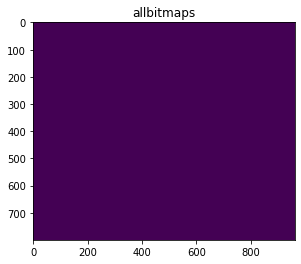

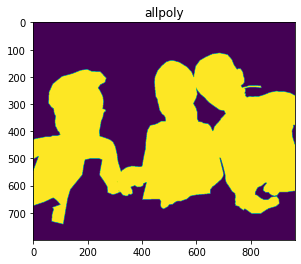

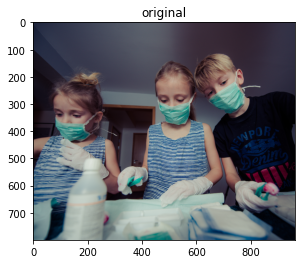

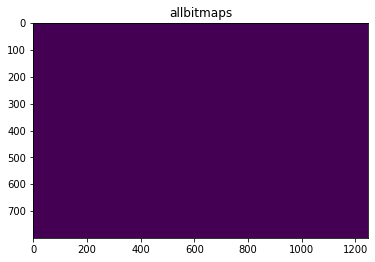

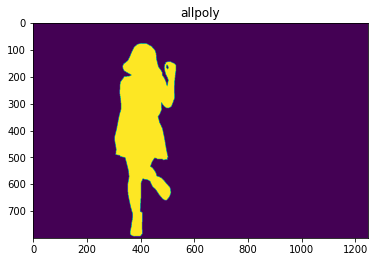

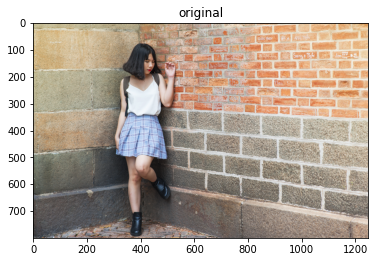

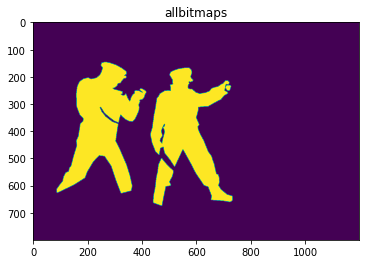

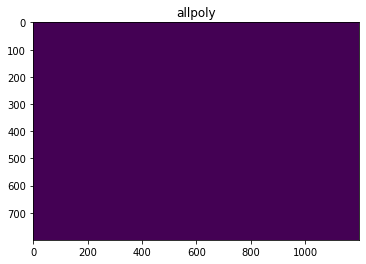

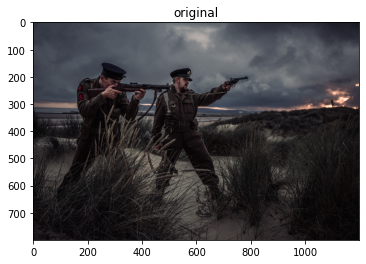

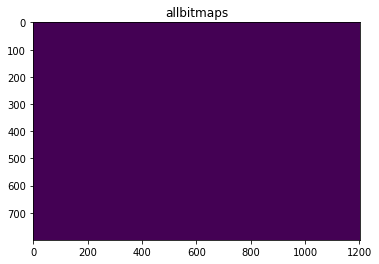

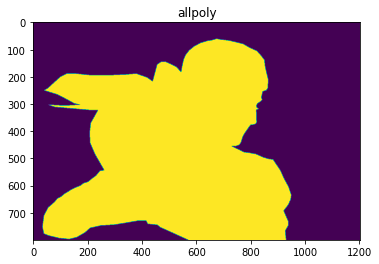

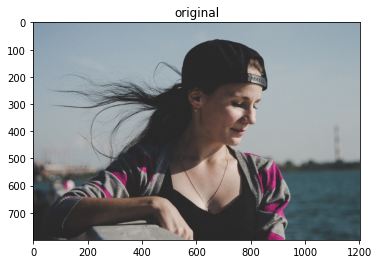

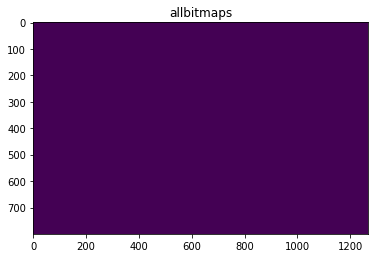

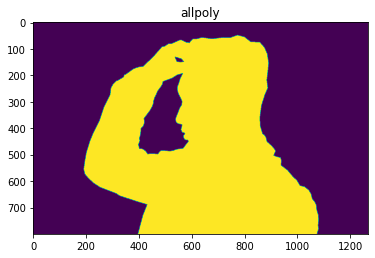

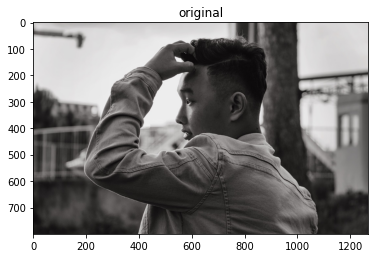

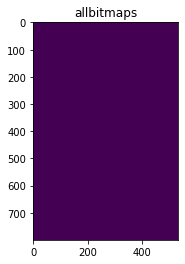

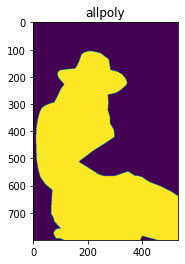

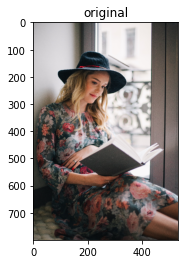

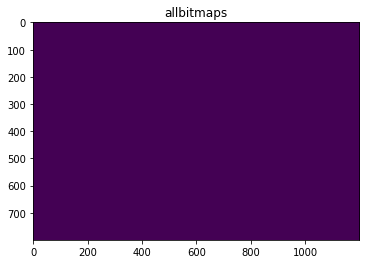

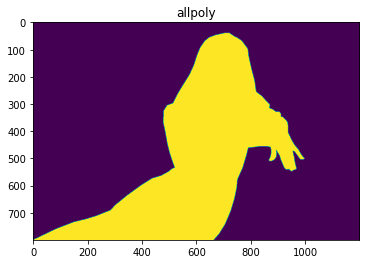

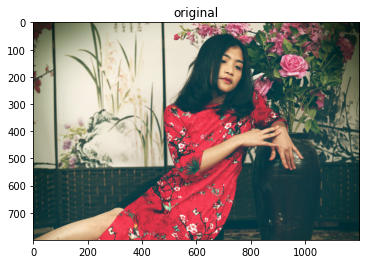

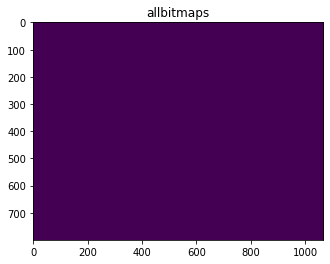

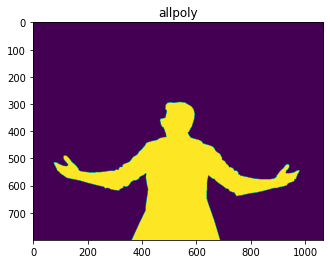

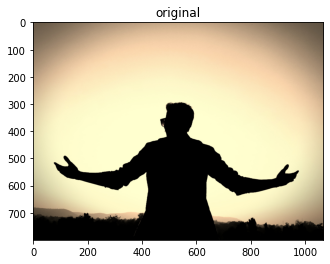

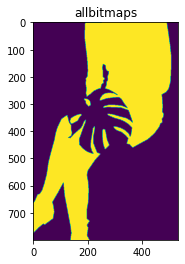

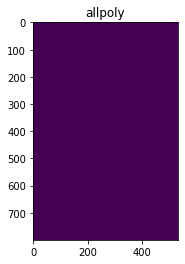

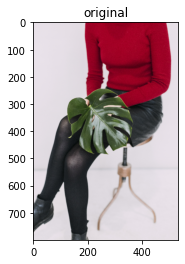

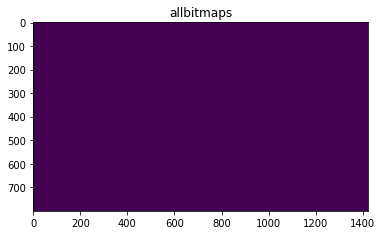

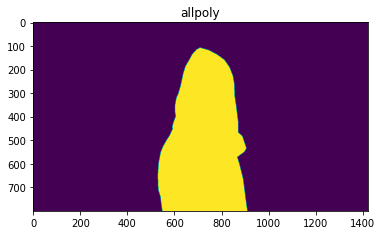

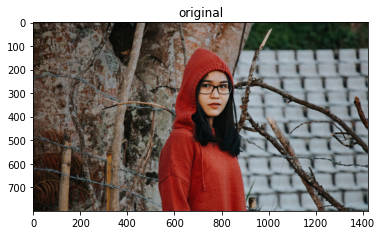

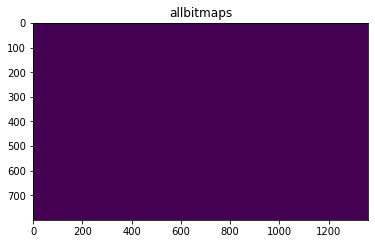

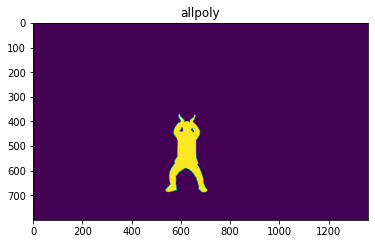

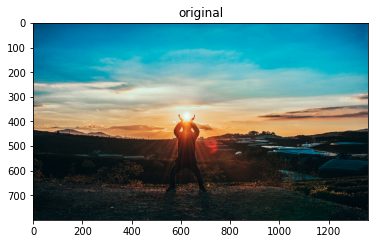

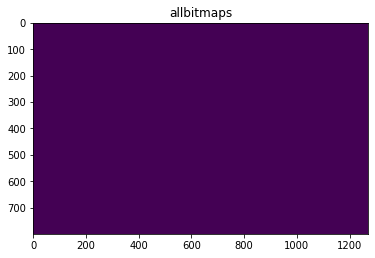

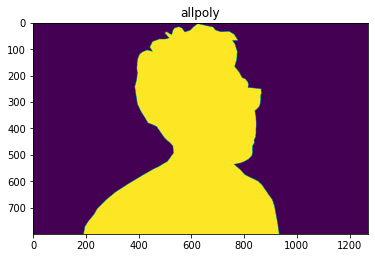

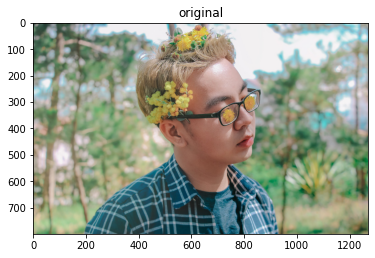

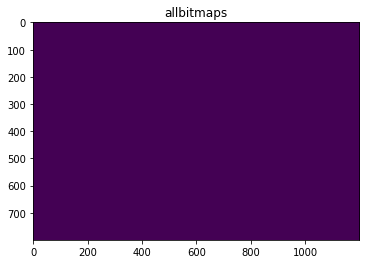

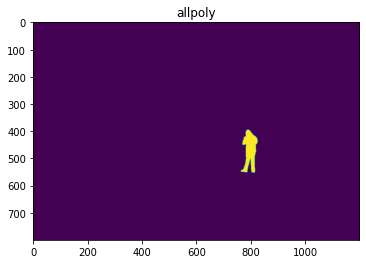

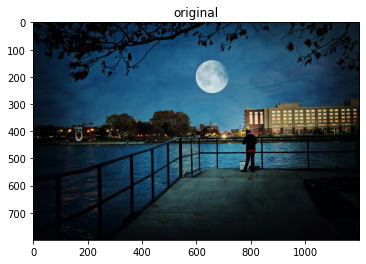

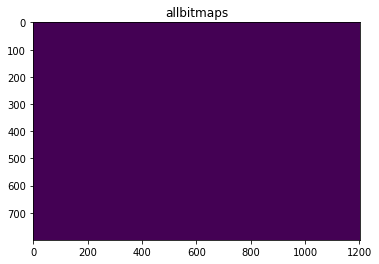

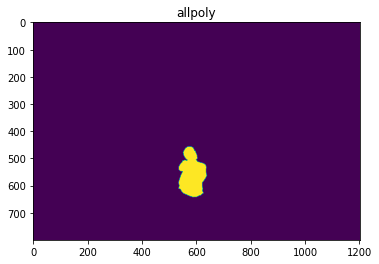

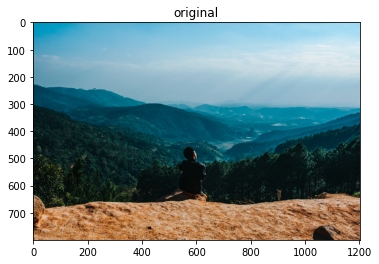

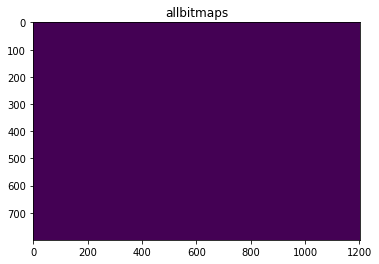

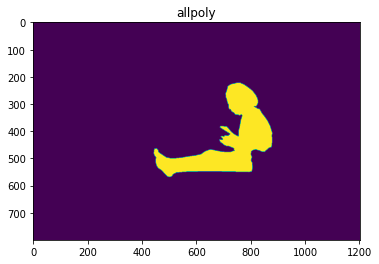

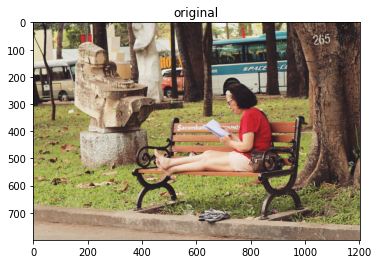

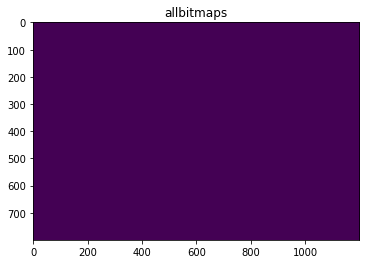

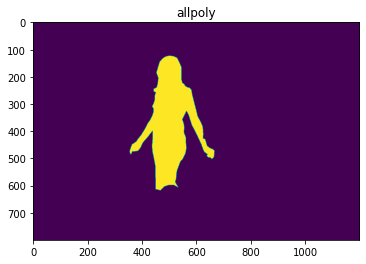

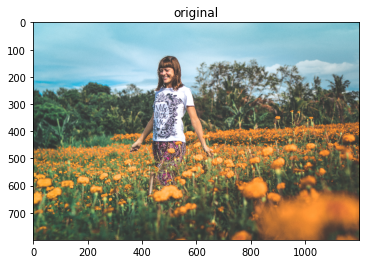

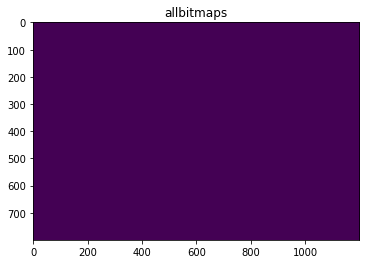

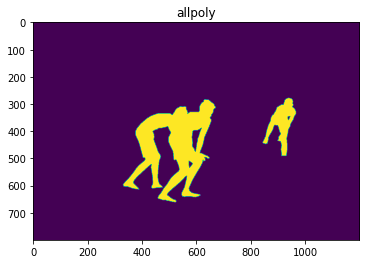

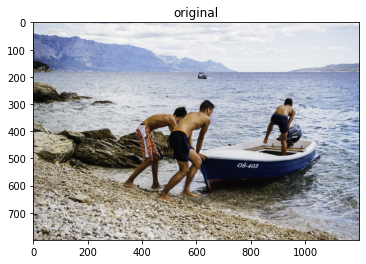

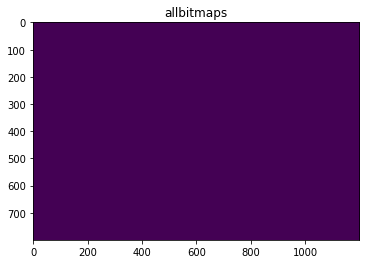

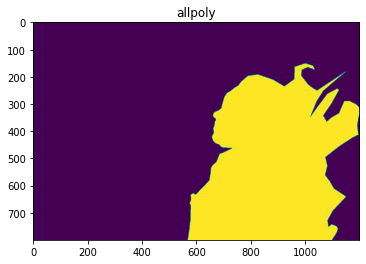

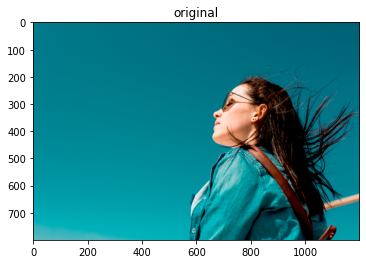

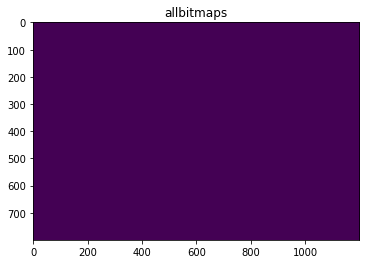

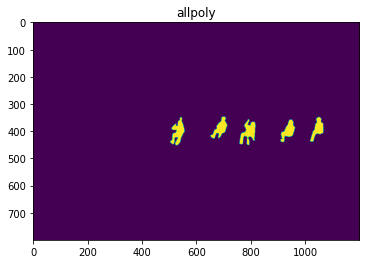

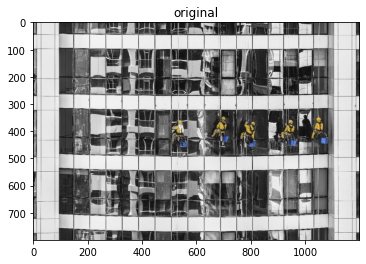

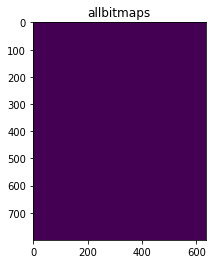

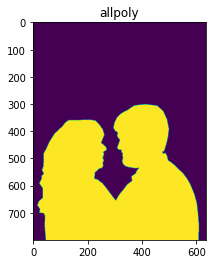

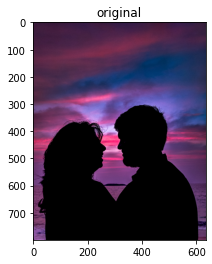

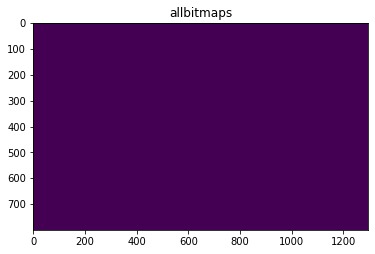

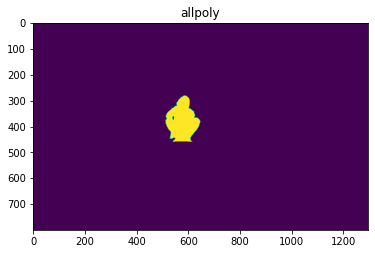

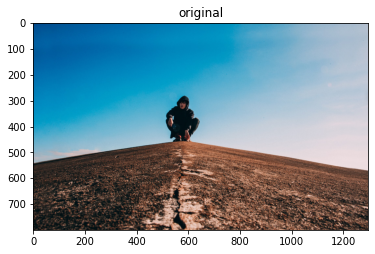

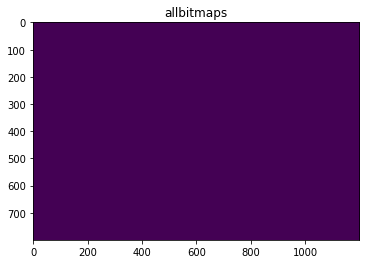

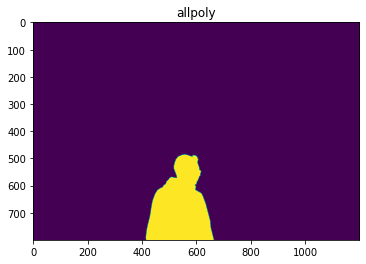

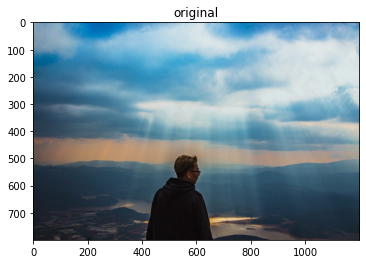

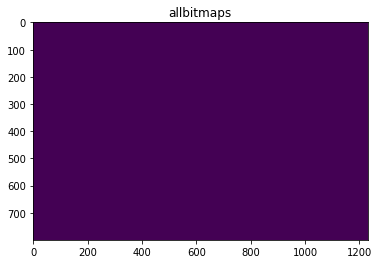

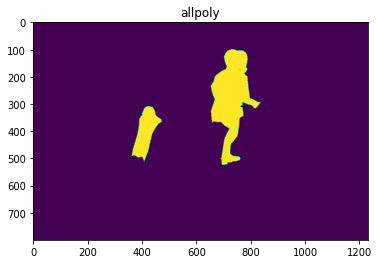

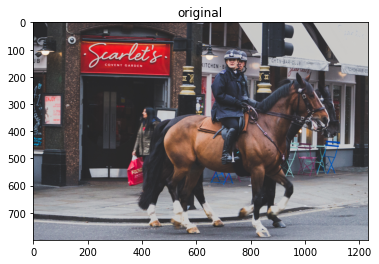

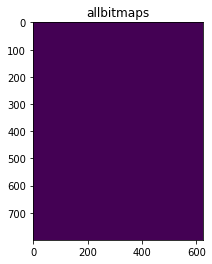

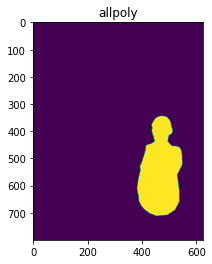

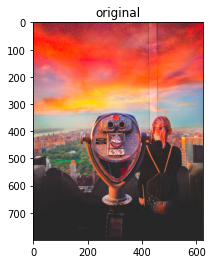

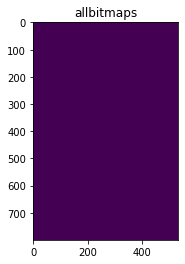

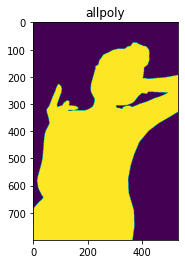

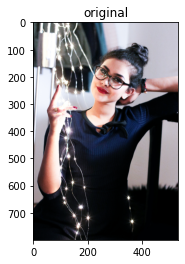

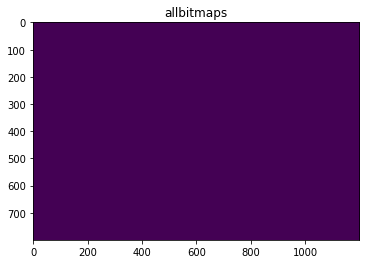

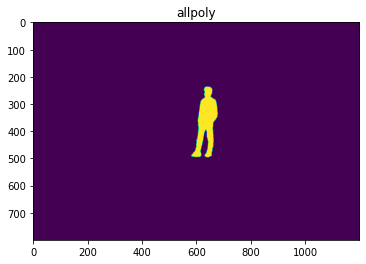

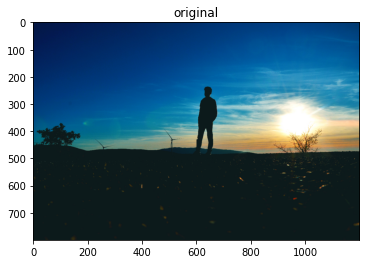

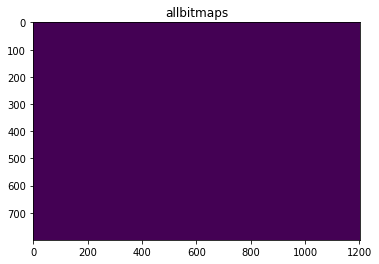

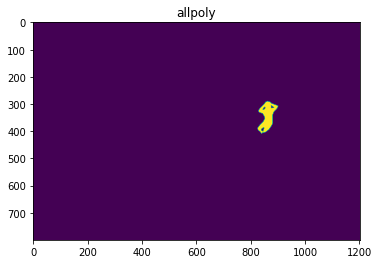

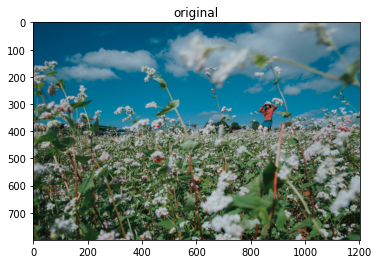

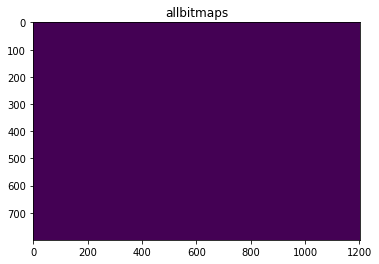

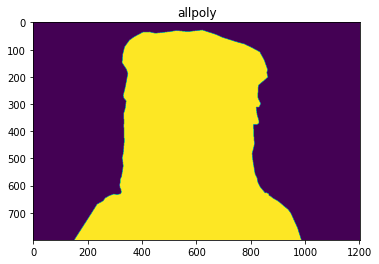

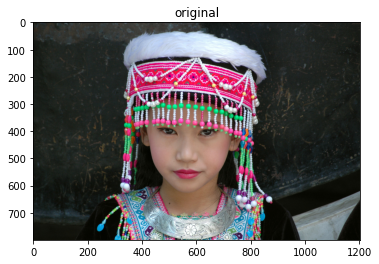

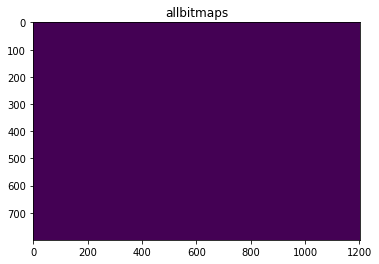

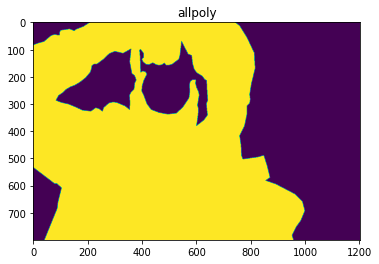

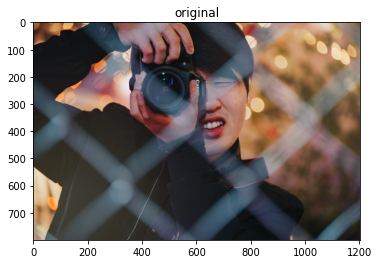

In [ ]:
basedir="/content/Supervisely Person Dataset/ds10/ann"
listofdirs=os.listdir(basedir)
for i in range(29):
  pathstr=basedir+"/"+listofdirs[i]
  print(pathstr)
  load_one_faster(pathstr,debug=True)

/content/Supervisely Person Dataset/ds10/ann/pexels-photo-860481.png.json


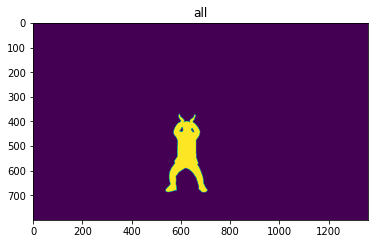

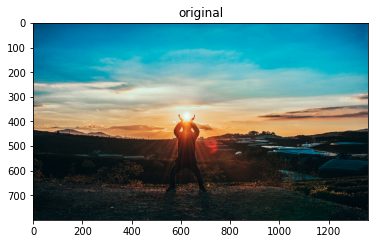

In [ ]:
basedir="/content/Supervisely Person Dataset/ds10/ann"
listofdirs=os.listdir(basedir)

pathstr=basedir+"/"+listofdirs[10]
print(pathstr)
load_one_faster(pathstr,debug=False,nointerior=False)
# load_one_faster(pathstr,debug=False,nointerior=True)